## Wykrywanie zdarzeń za pomocą metody `Abnormal Return, AbR`

---

Aby wyznaczyć daty zdarzeń (ang. Event Date Detection, EDD) w tym artykule, można zastosować metodę analizy abnormal returns — czyli "nienormalnych zwrotów" ceny akcji — która pozwala identyfikować daty potencjalnych wydarzeń mających wpływ na rynek. Kroki są następujące:

1. Obliczenie rozkładu procentowego zwrotu ceny dla danej daty:

Obliczamy, na ile zwrot ceny w danym dniu jest nietypowy w porównaniu z wcześniejszymi wartościami. Aby to zrobić, stosujemy procentowe zwroty:
$$
pctl = (R_0, ..., R_n) = \frac{\sum_{i=1}^n step(sign(R_0)*(R_0 - R_i))}{n}
$$
Gdzie:
- $R_0$ to zwrot ceny w dniu, dla którego liczymy wartość, a $R_1, ..., R_n$ zwroty w n wcześniejszych dniach,
- Funkcja `step(x)` wynosi $1$, gdy $x>0$ , i $0$ w przeciwnym przypadku.

2. Wyznaczenie miary anormalności
Aby ułatwić identyfikację daty zdarzenia, warto wprowadzić miarę nienormalności zwrotu (*Abnormal Return, AbR*), która bierze pod uwagę zarówno zmienność długookresową, jak i krótkookresową. Formuła nienormalności jest następująca:
$$
    AbR(R_0​,R_1​,…,R_L​)=pctl(R_0​,R_1​,…,R_L​)×pctl(∣R_0​∣,∣R_1​∣,…,∣R_L​∣)×pctl(R_0​,R_1​,…,R_S​)×pctl(∣R_0​∣,∣R_1​∣,…,∣R_S​∣)
$$
Gdzie:
- $L$ to liczba dni dla długiego okresu,
- $S$ to liczba dni dla krótkiego okresu.

3. Wyznaczenie daty zdarzenia

Po obliczeniu wartości AbR dla danego dnia, porównuje się ją z ustalonym progiem, np. $0,94$ (zgodnie z artykułem). Jeśli *AbR* przekroczy próg, dzień uznaje się za datę zdarzenia.

Źródło: Event Detection in Financial Markets, *Mohammad Shirdel, Michele Segata, Giuseppe Di Fatta, Antonio Liotta*, Year: 2022 | Conference Paper | Publisher: IEEE



In [8]:
import numpy as np
import pandas as pd

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [6]:
import numpy as np
import pandas as pd
from scripts import StockPriceDatabase
pd.options.mode.chained_assignment = None 

TICKER = "CCC"

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [14]:
# Download example market price
spd = StockPriceDatabase()
market_historical = spd.get_stock_price(TICKER)

# Get selected data
market_data = market_historical[["Close"]]
market_data["Returns"] = market_data["Close"].pct_change()
market_data = market_data.dropna()

In [1]:
market_data["Close"]

NameError: name 'market_data' is not defined

In [12]:
def pctl(returns, n = 5):
    return np.array([np.sum( (np.sign(returns[i]) * (returns[i] - returns[np.max([i-n, 0]): i]) > 0) ) / n 
            for i, _ in enumerate(returns)])

def abr(returns, ns = 5, nl = 30):
    return pctl(returns, nl) * pctl(np.abs(returns), nl) *  pctl(returns, ns) * pctl(np.abs(returns), ns)
    

In [51]:
market_data["AbR"] = abr(market_data["Returns"].to_numpy())

# Add threshold 0.94
x = market_data[market_data["AbR"] > 0.99].index
z = x.astype('datetime64[ns]')[1:] - x.astype('datetime64[ns]')[:-1]
z = (z / np.timedelta64(1, 'D')).astype(int)

for i in x:
    print(i)

2005-01-21
2005-02-23
2005-03-23
2005-07-13
2005-07-27
2005-08-04
2005-10-31
2005-11-14
2006-01-03
2006-03-07
2006-03-08
2006-04-21
2006-09-13
2006-11-29
2007-02-05
2007-03-02
2007-03-07
2007-03-08
2007-03-19
2007-04-03
2007-05-23
2007-08-10
2007-08-16
2007-11-16
2008-02-27
2008-04-25
2008-06-23
2008-07-16
2008-07-23
2008-09-26
2009-01-06
2009-01-15
2009-03-03
2009-04-29
2009-05-04
2009-05-14
2009-07-15
2009-09-07
2009-11-16
2010-03-26
2010-03-31
2010-05-07
2010-05-10
2010-07-02
2010-09-03
2010-09-27
2010-10-13
2010-12-17
2011-01-25
2011-03-17
2011-05-09
2011-05-10
2011-06-02
2011-08-03
2011-08-29
2011-09-22
2012-01-24
2012-02-15
2012-04-17
2012-05-04
2012-10-09
2012-10-19
2012-12-14
2013-01-09
2013-02-14
2013-04-02
2013-06-04
2013-06-20
2013-06-27
2013-08-02
2013-08-12
2013-09-19
2013-11-08
2014-01-13
2014-01-22
2014-03-03
2014-05-07
2014-07-25
2014-11-07
2015-01-07
2015-01-08
2015-02-26
2015-06-02
2015-08-24
2015-11-06
2015-12-09
2016-02-25
2016-06-03
2016-06-24
2016-09-09
2016-11-14

In [29]:
# Compare EDD date with publication date
report_data = pd.read_csv("../database/reportData/Annual_Value.csv", index_col=[0])
report_data[report_data["Ticker"] == TICKER] 

,Ticker,Date,Przychody ze sprzedaży,Techniczny koszt wytworzenia produkcji sprzedanej,Koszty sprzedaży,Koszty ogólnego zarządu,Zysk ze sprzedaży,Pozostałe przychody operacyjne,Pozostałe koszty operacyjne,Zysk operacyjny (EBIT),...,Rozliczenia międzyokresowe,Pasywa razem,Przepływy pieniężne z działalności operacyjnej,Amortyzacja,Przepływy pieniężne z działalności inwestycyjnej,CAPEX (niematerialne i rzeczowe),Przepływy pieniężne z działalności finansowej,Emisja akcji,Dywidenda,Przepływy pieniężne razem
131,CCC,2005-10-03,330926.0,185291.0,75866.0,15356.0,54413.0,3836.0,3380.0,54869.0,...,0.0,204491.0,45984.0,3905.0,-21306.0,21795.0,-21920.0,0.0,0.0,2758.0
132,CCC,2006-05-15,400857.0,219199.0,107283.0,12674.0,61701.0,6005.0,5663.0,62043.0,...,0.0,240882.0,20419.0,5405.0,-23963.0,36274.0,-20513.0,0.0,38400.0,-24057.0
133,CCC,2007-06-05,544493.0,265815.0,189535.0,6318.0,82825.0,1471.0,21050.0,63246.0,...,0.0,323236.0,30537.0,9133.0,-49237.0,38753.0,20713.0,0.0,38400.0,2013.0
134,CCC,2008-04-30,754281.0,348942.0,266274.0,8319.0,130746.0,19349.0,18179.0,131916.0,...,0.0,491597.0,43560.0,13026.0,-57689.0,58090.0,18600.0,0.0,0.0,4471.0
135,CCC,2009-04-30,922408.0,441206.0,361448.0,13133.0,106621.0,11840.0,10302.0,108159.0,...,0.0,551125.0,124659.0,18346.0,-44838.0,46370.0,-34284.0,0.0,38400.0,45537.0
136,CCC,2010-04-30,1028559.0,472127.0,406234.0,14744.0,135454.0,9955.0,16290.0,129119.0,...,0.0,678222.0,89202.0,22166.0,-51580.0,60637.0,-15452.0,0.0,38400.0,22170.0
137,CCC,2011-04-22,1091260.0,478447.0,429373.0,18395.0,165045.0,9755.0,15748.0,159052.0,...,0.0,965613.0,-13360.0,24242.0,-96180.0,116357.0,61401.0,0.0,57600.0,-48139.0
138,CCC,2012-04-27,1317457.0,639059.0,520542.0,7204.0,150652.0,10458.0,19776.0,141334.0,...,0.0,978114.0,207441.0,38980.0,-51194.0,56040.0,-65465.0,0.0,61440.0,90782.0
139,CCC,2013-04-30,1643139.0,806434.0,623016.0,29313.0,184376.0,12058.0,28917.0,167517.0,...,0.0,1119727.0,145354.0,37683.0,-92625.0,96844.0,-34701.0,0.0,61440.0,18028.0
140,CCC,2014-04-30,2009059.0,902847.0,775298.0,78322.0,252592.0,20497.0,29855.0,243234.0,...,0.0,1794232.0,54045.0,52707.0,-205194.0,196826.0,169319.0,0.0,61440.0,18170.0


### Model sieci LSTM

In [206]:
import numpy as np
import pandas as pd
from scripts import StockPriceDatabase
pd.options.mode.chained_assignment = None 

In [207]:
# Download example market price
spd = StockPriceDatabase()
ticker = "CCC"
market_historical = spd.get_stock_price(ticker)

# Get stock prices
prices = market_data["Close"].to_numpy().reshape(-1,1)

In [208]:
def windowing_signal(signal, n=60):
    x = []
    y = []
    for i in range(n, len(signal)):
        x.append(signal[i-n : i, 0])
        y.append(signal[i, 0])
    x = np.array(x)
    y = np.array(y)

    return x.reshape(x.shape[0], x.shape[1], 1), y.reshape(y.shape[0], 1)


In [209]:
## Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]
x_train, y_train = windowing_signal(train_data)
x_test, y_test = windowing_signal(train_data)

In [211]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [212]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0222
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0024
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0022
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0020
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0018
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0015
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0017
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0016
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0016
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0016
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0014
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0013
Epoch 13/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0014
Epoch 14/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0013
Epoch 15/100
107/107 ━━━━━━━

In [213]:
model.save('../database/models/ccc.keras')

In [195]:
# Evaluate the model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

Train Loss: 0.000137
Test Loss: 0.000137


In [196]:
y_predict = model.predict(x_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


In [198]:
(y_test - y_predict).mean()

np.float64(-0.0023854721931414135)

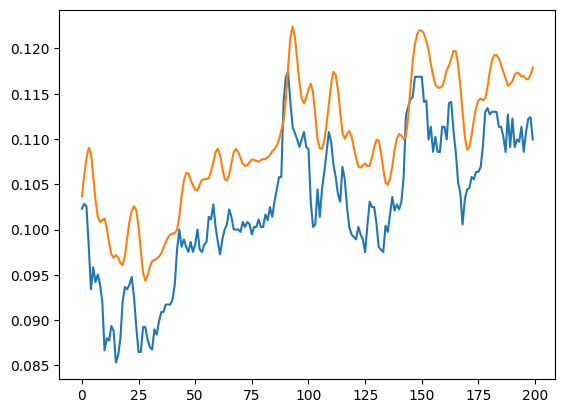

In [183]:
import matplotlib.pyplot as plt

plt.plot(y_test[300:500])
plt.plot(y_predict[300:500])